# Network analysis of Javanese _Wayang Kulit_ Networks

This is the companion code to Chapter 5 of *Theater as data: Computational Journeys into theater research* (University of Michigan Press, 2021) by [Miguel Escobar Varela](https://miguelescobar.com). 

The book is openly accessible at https://doi.org/10.3998/mpub.11667458.


An interactive visualization of the wayang kulit network analyzed here is available at https://villaorlado.github.io/wayangnetworks/html/canonical.html. A video of this visualization is available at Fulcrum.

### 1 Importing the relevant libraries

First, we import [Pandas](https://pandas.pydata.org/) to read the data into dataframes and [Seaborn](https://seaborn.pydata.org/) for the visualizations. We will also use `math` later for some calculations.

In [12]:
import pandas as pd
import seaborn as sns
import math

### 2 Importing the data

We will use the **5.4_wayangNodeInfo.csv** file included under the book's data at Fulcrum. The data was generated in [Gephi](https://gephi.org/). The Gephi file is also available for download from Fulcrum. For more information on how the data was processed, and how each network element relates to the _wayang kulit_ stories please see the Digital Wayang Encyclopedia at https://villaorlado.github.io/wayangnetworks/html/. 

First, we will read the CSV file into a data frame called **df**. The syntax assumes that the CSV is under a directory called **data/ch5**.

In [3]:
df = pd.read_csv('../../data/ch5/5_4_wayangNodeInfo.csv')

### 3 Exploratory analysis

For our initial exploration of the data, we will use two commands: **head()** inspects the first 5 rows of the dataframe, and **describe()** offers summary statistics.

In [4]:
df.head()

,id,origin,type,degree,weighted degree,eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,componentnumber,clustering,triangles,eigencentrality
0,Abimanyu,India,Human,68,384.0,2.0,0.651786,0.732877,53.752954,3,0,0.586040,1335,0.651628
1,Abiyasa,India,Human,69,160.0,2.0,0.654709,0.736301,115.354680,5,0,0.497016,1166,0.610243
2,Angganjali,Java,Human,24,32.0,2.0,0.544776,0.582192,0.000000,4,0,1.000000,276,0.285077
3,Anoman,India,Animal,78,347.0,2.0,0.682243,0.767123,92.569783,3,0,0.502165,1508,0.703116
4,Antaboga,Java,God,40,85.0,2.0,0.579365,0.636986,4.661974,3,0,0.862821,673,0.466900


In [5]:
df.describe()

,degree,weighted degree,eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,componentnumber,clustering,triangles,eigencentrality
count,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000
mean,40.857143,115.319728,2.0,0.591799,0.639922,52.571429,3.591837,0.0,0.840175,642.142857,0.400663
std,29.546805,163.017689,0.0,0.090250,0.101188,129.408855,2.154178,0.0,0.226082,647.380369,0.212890
min,17.000000,19.000000,2.0,0.530909,0.558219,0.000000,0.000000,0.0,0.286576,136.000000,0.180655
25%,23.000000,30.000000,2.0,0.542751,0.578767,0.000000,3.000000,0.0,0.722398,253.000000,0.267753
50%,27.000000,45.000000,2.0,0.550943,0.592466,0.000000,4.000000,0.0,1.000000,351.000000,0.314486
75%,43.000000,88.500000,2.0,0.586383,0.647260,18.532590,5.000000,0.0,1.000000,650.500000,0.459663
max,138.000000,734.000000,2.0,0.948052,0.972603,729.472486,6.000000,0.0,1.000000,2709.000000,1.000000


Using **loc** we can select the subset of the data that meets a certain condition. For example, the characters where the origin is "India". 

In [6]:
df.loc[df.origin == "India"]

,id,origin,type,degree,weighted degree,eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,componentnumber,clustering,triangles,eigencentrality
0,Abimanyu,India,Human,68,384.0,2.0,0.651786,0.732877,53.752954,3,0,0.586040,1335,0.651628
1,Abiyasa,India,Human,69,160.0,2.0,0.654709,0.736301,115.354680,5,0,0.497016,1166,0.610243
3,Anoman,India,Animal,78,347.0,2.0,0.682243,0.767123,92.569783,3,0,0.502165,1508,0.703116
8,Arimbi,India,Raksasa,45,102.0,2.0,0.591093,0.654110,18.672180,0,0,0.712121,705,0.470388
9,Arjuna,India,Human,125,715.0,2.0,0.874251,0.928082,480.944638,0,0,0.320516,2484,0.956312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Ugrasena,India,Human,46,79.0,2.0,0.593496,0.657534,37.469238,5,0,0.620290,642,0.348632
136,Werkudara,India,Human,116,734.0,2.0,0.829545,0.897260,321.308587,0,0,0.348576,2325,0.914203
140,Wisnu,India,God,30,47.0,2.0,0.557252,0.602740,1.150099,3,0,0.928736,404,0.371830
143,Yamadipati,India,God,24,28.0,2.0,0.544776,0.582192,0.000000,3,0,1.000000,276,0.319610


Then we can obtain the arithmetic mean for the "weighted degree" column in the dataframe.

In [8]:
df.loc[df.origin == "India"]["weighted degree"].mean()

153.46753246753246

We can then compare this with characters of Javanese origin.

In [9]:
df.loc[df.origin == "Java"]["weighted degree"].mean()

73.35714285714286

To get the proportion of Indian-derived characters, we then divide the amount of characters where the origin is "India" by the total row count.

In [10]:
df.loc[df.origin == "India"]["id"].count() / df["id"].count()

0.5238095238095238

The numbes above show that the Indian characters make up **52.4%** of the data. Their average degree is **48.4** while the average degree of Javanese characters is **32.5**.

To calculate Cohen's *d* for effect size, we can use the following code from:

Downey, Allen. 2014. *Think Stats: Exploratory Data Analysis in Python.* Open Textbook Library. Needham: Green Tea Press.


In [13]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

We then assign the degrees of Indian characters to the variable **India** and the degrees of Javanese characters to the variable **Java**. We then pass these variables to the newly created **CohenEffectSize** function.

In [14]:
India= df.loc[df.origin == "India"]["weighted degree"]
Java= df.loc[df.origin == "Java"]["weighted degree"]
CohenEffectSize(India,Java)

0.5053629835470679

This number shows that the difference in means between Indian and Javanese characters is **0.55** standard deviations. See Chapter 5 of _Theater as data_ for an interpretation of this result.

### 4 Visualization

We are interested in generating a pairplot that compares weighted degree, betweenness centrality, and eigencentrality. We also want to group the datapoints by character origin (India and Java). First, we need to create a new dataframe, **wayang_subset** that only keeps the columns of interest.

In [15]:
wayang_subset = df[["weighted degree","betweenesscentrality","eigencentrality","origin"]]

Then we use the seaborn **pairplot** function to visually compare the data in the different columns. We assign "origin" to the **hue** parameter, in order to separate characters of Javanese and Indian origin.

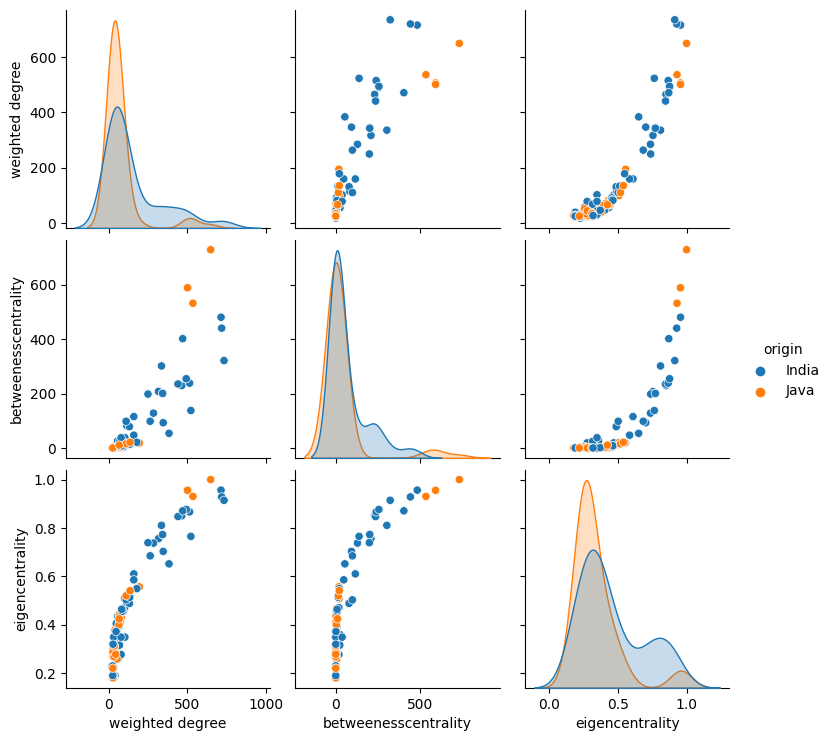

In [16]:
sns.pairplot(wayang_subset, hue="origin")